# Обучение без учителя
# Кластеризация

**Параметры кластеризации:**

n_clusters — количество кластеров. По умолчанию — 8.  

init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.

n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.  

max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.  

random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.zip')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


Визуализация кластеров по двум признакам

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

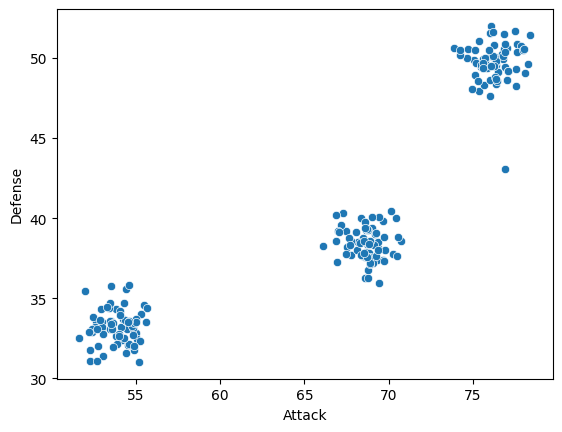

In [3]:
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

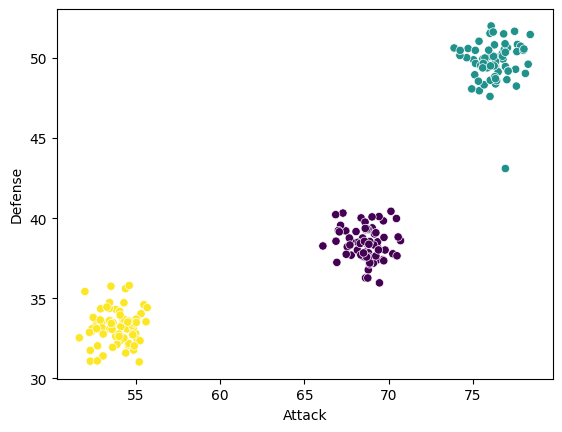

In [4]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

# если мы хотим получить метки класса для тех же данных, 
# на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions
display(df)
#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Пробуем делить на четыре кластера для выброса

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

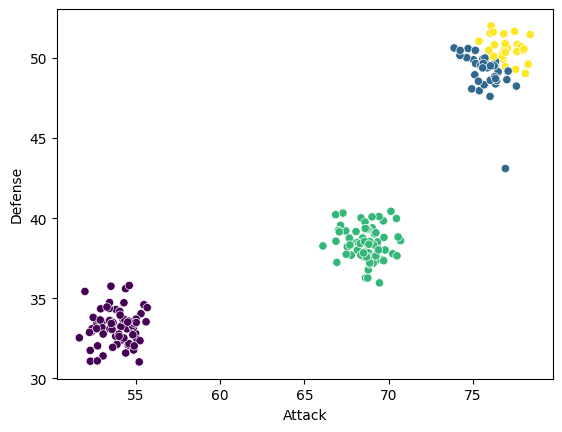

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)


predictions = kmeans.predict(X)
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

# Метод локтя, поиск инерции

c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

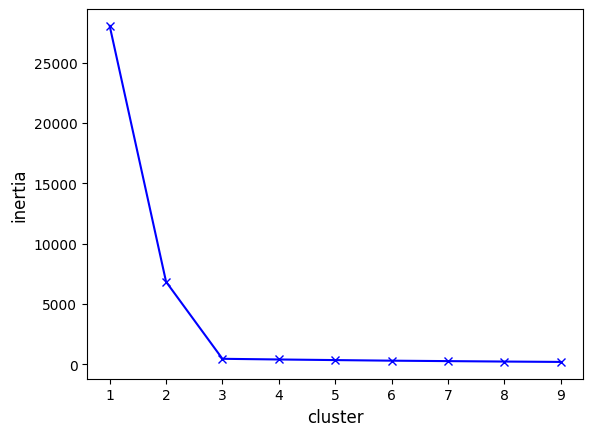

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means 
# и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia


inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) 
# и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

# Расчёт коэффициента силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

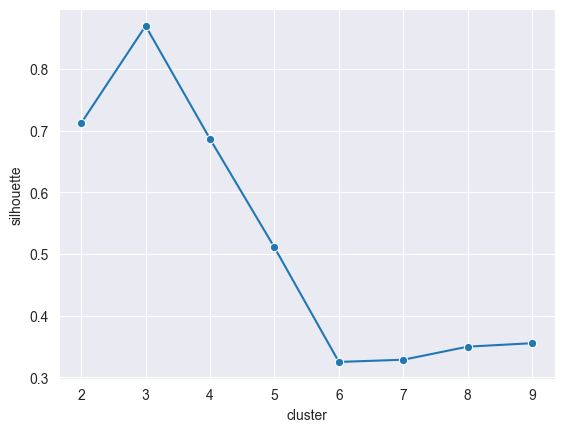

In [7]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, 
# к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

# Пример на данных

In [8]:
df_1 = pd.read_csv('values_from_the_instrument.zip')


Ищем инерцию через локоть

c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

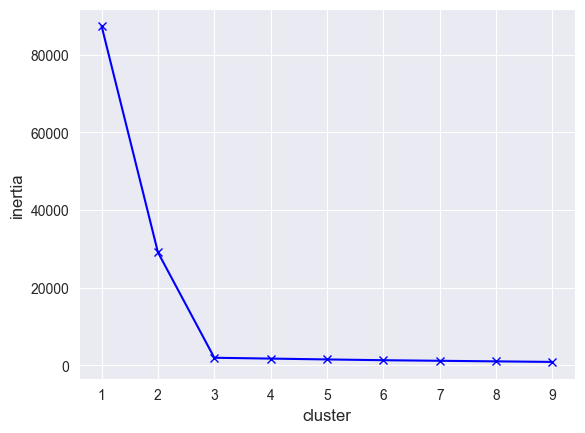

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means 
# и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia


inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) 
# и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, df_1))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Ищем коэффициент силуэта

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

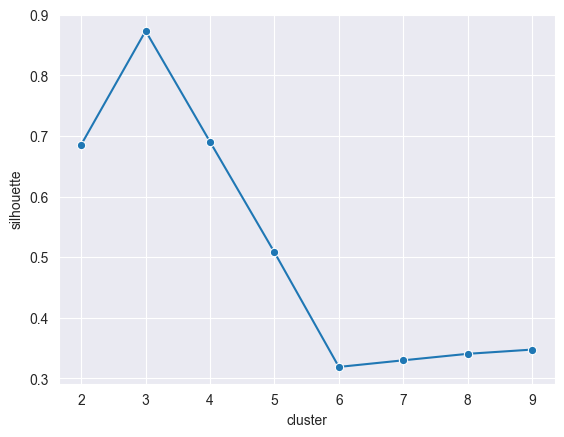

In [10]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, 
# к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df_1[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df_1))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

<AxesSubplot: xlabel='x1', ylabel='x2'>

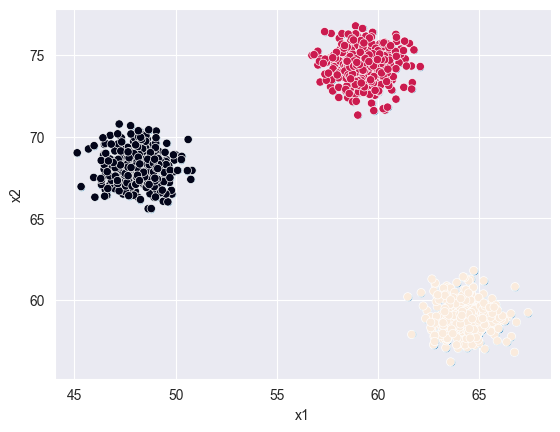

In [11]:
sns.scatterplot(x=df_1.x1, y=df_1.x2)

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                random_state=42)

# запустим обучение модели
kmeans.fit(df_1)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(df_1)

# если мы хотим получить метки класса для тех же данных, 
# на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df_1['Clusters_k3'] = predictions

#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df_1.x1, y=df_1.x2, c=predictions)

# Метрики

## ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)

In [12]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print()
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))
print()
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))
# labels_true — это реальные значения: 
# в кластере 0 — собаки, в кластере 1 — кошки. 
# В первый раз мы предсказали, что в кластере 0 находятся две собаки, 
# а в кластере 1 — две кошки. 
# Метрика однородности равна 1, так как внутри кластеров разные объекты 
# и наши ответы полностью совпали с labels_true.
# Во втором случае, казалось бы, будет неверно, 
# если в кластере 0 будут кошки, а в кластере 1 — собаки. 
# Но, судя по составу кластеров, кошки и собаки не перемешались, 
# поэтому однородность кластеров будет равна 1

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))




1.0

1.0

0.737175493807016
1.0
1.0


## ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)

In [13]:
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


## V-МЕРА (V-MEASURE)

In [14]:
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))


print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


## ИНДЕКС РЭНДА

In [15]:
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])


1.0

# Иерархическая кластеризация

## Агломерация 
n_clusters — количество кластеров; по умолчанию — 2.  
linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.

# EM-КЛАСТЕРИЗАЦИЮ
# GaussianMixture

array([1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2], dtype=int64)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

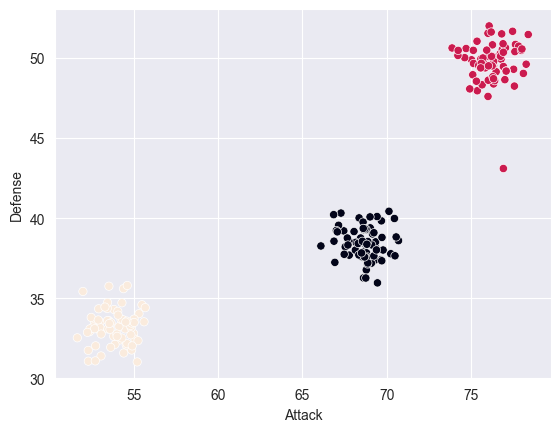

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture

df = pd.read_csv('pokemon.zip')
X = df[['Attack', 'Defense']]

gm_clustering = GaussianMixture(n_components=3, # количество кластеров
                                random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)\

df['Clusters_GaussianMixture'] = gm_prediction
display(gm_prediction)
#визуализируем результаты. 
# Параметр c принимает вектор с номерами классов 
# для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

# Спектральная кластеризация

In [17]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

# DBSCAN Кластеризация на основе плотности

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

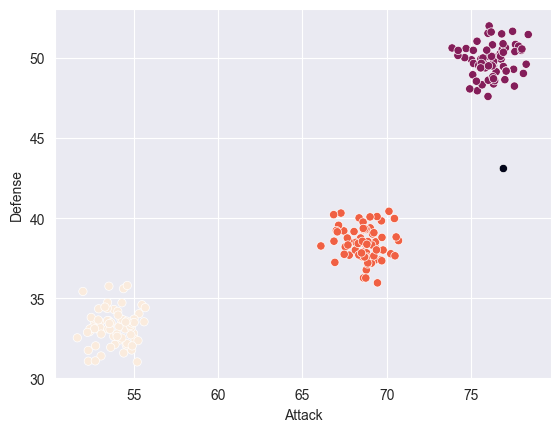

In [18]:
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, # eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
                    min_samples=3 # min_samples — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.
                    ).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)